### Basic Data Analysis (cont.)

In [2]:
%cd C:\Users\Max\Desktop\PythonColumbiaClass\SummerPythonCourse\Week8
import pandas as pd

C:\Users\Max\Desktop\PythonColumbiaClass\SummerPythonCourse\Week8


In [3]:
births=pd.read_csv("births.csv")
type(births)

pandas.core.frame.DataFrame

In [4]:
len(births)

15547

In [5]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [7]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15547 non-null object
gender    15547 non-null object
births    15547 non-null int64
dtypes: int64(3), object(2)
memory usage: 607.4+ KB


In [6]:
births.describe()

,year,month,births
count,15547.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,9762.293561
std,6.728340,3.449632,28552.465810
min,1969.000000,1.000000,1.000000
25%,1974.000000,4.000000,4358.000000
50%,1979.000000,7.000000,4814.000000
75%,1984.000000,10.000000,5289.500000
max,2008.000000,12.000000,199622.000000


In [9]:
births['gender'].value_counts()

F    7776
M    7771
Name: gender, dtype: int64

In [12]:
#let us add a row with a missing value for gender: 
import numpy as np
births.loc[len(births)]=[2008,12,7," ",np.NaN]

In [13]:
births.tail()

,year,month,day,gender,births
15543,2008,11,null,F,158939.0
15544,2008,11,null,M,165468.0
15545,2008,12,null,F,173215.0
15546,2008,12,null,M,181235.0
15547,2008,12,7,,NaN


In [17]:
births[['day']].iloc[15546].isnull()

day    False
Name: 15546, dtype: bool

In [18]:
births[['gender']].iloc[15547].isnull()

gender    False
Name: 15547, dtype: bool

In [19]:
births[['births']].iloc[15547].isnull()

births    True
Name: 15547, dtype: bool

In [23]:
#now, let us replace this missing value of births above with a mean birth across all non-missing
#records.  This is called imputation: 
births['births'].fillna(births['births'].mean(),inplace=True)
births.tail()

,year,month,day,gender,births
15543,2008,11,null,F,158939.000000
15544,2008,11,null,M,165468.000000
15545,2008,12,null,F,173215.000000
15546,2008,12,null,M,181235.000000
15547,2008,12,7,,9762.293561


In [24]:
#now, let us find unique values of gender in the births data frame: 
births['gender'].unique()

array(['F', 'M', ' '], dtype=object)

In [ ]:
#Exercise: fill in the missing gender above with the most-commonly occurring non-missing gender: 


In [29]:
#your code goes here

births.tail()

,year,month,day,gender,births
15543,2008,11,null,F,158939.000000
15544,2008,11,null,M,165468.000000
15545,2008,12,null,F,173215.000000
15546,2008,12,null,M,181235.000000
15547,2008,12,7,F,9762.293561


### Basic Plotting in Python

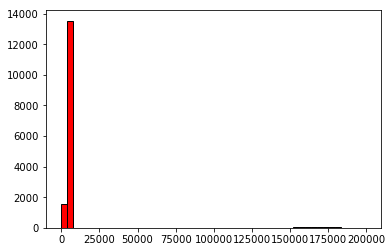

In [35]:
#basic plotting with Pandas, Matplotlib, Seaborn
%matplotlib inline
import matplotlib.pyplot as plt
#let us create a histogram of all births from the above data frame: 
births['births'].hist(bins=50,ec='black',grid=False,color="red")

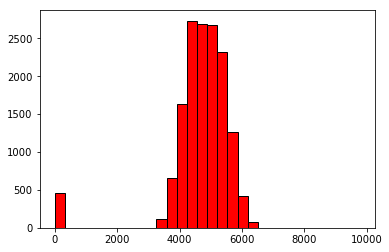

In [36]:
#we can see from the above that births data has very large outliers for its births variable, i.e.
#very large values in the right tail. So let us replot for just the births up to 25,000: 
births['births'][births['births']<=25000].hist(bins=30,ec='black',grid=False,color="red")

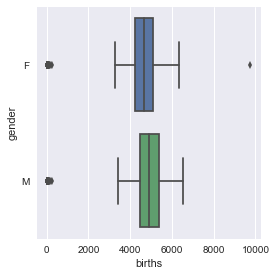

In [40]:
#let us further visualize the distribution of births using box plots: 
import seaborn as sns
sns.factorplot(x='births',y='gender',kind='box',data=births[births['births']<=25000])

In [ ]:
#in the above plots, we can see the left and right outliers, the median - vertical line inside the box - 
#the 25th and 75th percentiles as the left and right edges of the box, and the min and max values
#as the left and right bars to the sides of the box.

In [41]:
#scatter plots
#let us plot number of births by day for males:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046.0
1,1969,1,1,M,4440.0
2,1969,1,2,F,4454.0
3,1969,1,2,M,4548.0
4,1969,1,3,F,4548.0


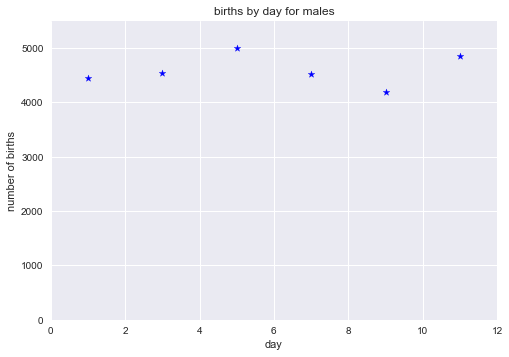

In [66]:
plt.scatter(x=births['day'][births['gender']=="M"].iloc[0:20].index,
            y=births['births'][births['gender']=="M"].iloc[0:20],
           color="blue",marker="*")
plt.title("births by day for males")
plt.xlabel("day")
plt.ylabel("number of births")
plt.ylim(ymin=-.0001,ymax=5500)
plt.xlim(xmin=-.0001,xmax=12)
plt.show() 

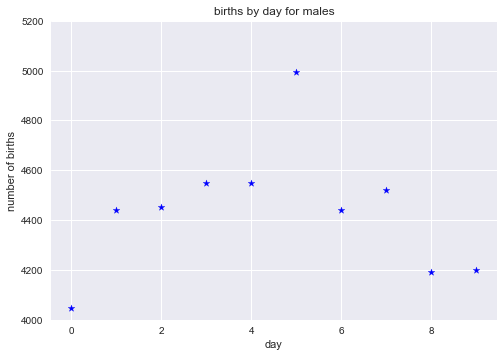

In [69]:
#let us adjust the above scatter plot: 
plt.scatter(x=births['day'].iloc[0:10].index,y=births['births'].iloc[0:10],
           color="blue",marker="*")
plt.title("births by day for males")
plt.xlabel("day")
plt.ylabel("number of births")
plt.ylim(ymin=4000,ymax=5200)
#plt.xlim(xmin=-1,xmax=10)
plt.show() 
#in general, use scatter plot to show the relationship between 2 variables

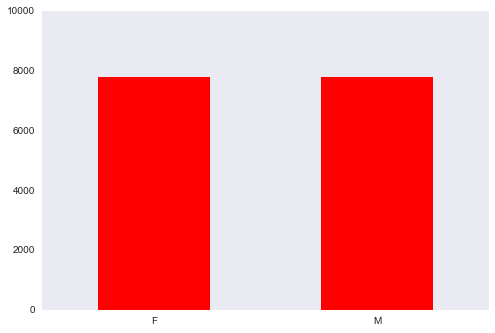

In [62]:
#bar plots - frequency of categorical variables: 
#let us visualize the frequency of males vs. females in the data set:
births['gender'].value_counts().plot(kind="bar",rot=True,
                                    ylim=[0,10000],grid=False,color="red")

### Group by Methods

In [70]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046.0
1,1969,1,1,M,4440.0
2,1969,1,2,F,4454.0
3,1969,1,2,M,4548.0
4,1969,1,3,F,4548.0


In [72]:
#let us obtain average births by gender:
grouped=births.groupby('gender')['births'].mean()
grouped

gender
F     9521.098790
M    10003.674559
Name: births, dtype: float64

In [68]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [76]:
#group by 2 columns:
#let us group by year and gender to get the mean number of births: 
births_subset=births[births['year']<=1972]
grouped=births_subset.groupby(['year','gender'])['births'].mean().map(lambda x:format(x,'.2f'))
grouped


year  gender
1969  F         4566.76
      M         4808.78
1970  F         4737.41
      M         4996.45
1971  F         4558.46
      M         4769.64
1972  F         4157.56
      M         4381.91
Name: births, dtype: object

In [77]:
#above we get a hierarchichal index series frame with year and gender as indices: 
type(grouped)

pandas.core.series.Series

In [78]:
#we can now use this method to replace one of the indices with column names instead, and 
#to obtain a data frame:
a=grouped.unstack()
print(type(a))
a

<class 'pandas.core.frame.DataFrame'>


gender,F,M
year,,
1969,4566.76,4808.78
1970,4737.41,4996.45
1971,4558.46,4769.64
1972,4157.56,4381.91


In [86]:
#the best way to gain maximum flexibility using group by aggregation methods is to use aliases: 
#let us group by gender and obtain the following: a new column called 'year_range', which is 
#the difference between the max and the min year; average births; and maximum month: 
year_alias=[('year_range',lambda x: x.max()-x.min())]
births_alias=[('avg_births','mean')]
month_alias=[('max_month','max')]
grouped=births.groupby('gender')
result=grouped.agg({'year':year_alias,
                   'births':births_alias,
                   'month':month_alias})
result

,year,births,month
,year_range,avg_births,max_month
gender,,,
F,39,9521.098790,12
M,39,10003.674559,12


In [83]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [89]:
#now the true power of group by comes when we can call the apply method on each group
#defined by the group by: 
#let us say, I want to only get the 2 months and days (2 records) for each year for which
#the number of births were the largest: 
#we first define a function: 
def top(df,n=2):
    return df.sort_values(by='births')[-n:]
grouped=births_subset.groupby(['year','gender']).apply(top)
grouped

year  month day gender  births
year gender                                     
1969 F      764   1969     12  31      F  5602.0
            762   1969     12  30      F  5988.0
     M      463   1969      8   8      M  5926.0
            763   1969     12  30      M  6244.0
1970 F      1322  1970      9  22      F  5986.0
            1528  1970     12  29      F  6204.0
     M      1529  1970     12  29      M  6244.0
            1323  1970      9  22      M  6480.0
1971 F      1572  1971      1  19      F  5542.0
            2098  1971      9  28      F  5548.0
     M      1999  1971      8  10      M  5850.0
            2099  1971      9  28      M  5924.0
1972 F      3037  1972     12  19      F  4968.0
            2837  1972      9  15      F  5038.0
     M      2760  1972      8   8      M  5286.0
            3038  1972     12  19      M  5296.0

In [90]:
#we can also pass parameters with a comma: 
def top(df,n=2):
    return df.sort_values(by='births')[-n:]
grouped=births_subset.groupby(['year','gender']).apply(top,n=5)
grouped

year  month day gender  births
year gender                                     
1969 F      562   1969      9  26      F  5508.0
            470   1969      8  12      F  5542.0
            484   1969      8  19      F  5550.0
            764   1969     12  31      F  5602.0
            762   1969     12  30      F  5988.0
     M      413   1969      7  15      M  5810.0
            517   1969      9   3      M  5834.0
            485   1969      8  19      M  5860.0
            463   1969      8   8      M  5926.0
            763   1969     12  30      M  6244.0
1970 F      1354  1970     10   6      F  5786.0
            1308  1970      9  15      F  5806.0
            1530  1970     12  30      F  5820.0
            1322  1970      9  22      F  5986.0
            1528  1970     12  29      F  6204.0
     M      1329  1970      9  25      M  6166.0
            1501  1970     12  15      M  6202.0
            1179  1970      7  14      M  6208.0
            1529  1970     12  29      M  6244.0
            1323  1970      9  22      M  6480.0
1971 F      2102  1971      9  30      F  5412.0
            1586  1971      1  26      F  5424.0
            2070  1971      9  14      F  5444.0
            1572  1971      1  19      F  5542.0
            2098  1971      9  28      F  5548.0
     M      2085  1971      9  21      M  5728.0
            2001  1971      8  11      M  5728.0
            2077  1971      9  17      M  5758.0
            1999  1971      8  10      M  5850.0
            2099  1971      9  28      M  5924.0
1972 F      2845  1972      9  19      F  4927.0
            2773  1972      8  15      F  4950.0
            3057  1972     12  29      F  4966.0
            3037  1972     12  19      F  4968.0
            2837  1972      9  15      F  5038.0
     M      3036  1972     12  18      M  5237.0
            2838  1972      9  15      M  5241.0
            2788  1972      8  22      M  5281.0
            2760  1972      8   8      M  5286.0
            3038  1972     12  19      M  5296.0

In [92]:
#exercise: find the difference between the max births and min births by year and month for
#the first 2 months and years using apply and a function call:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046.0
1,1969,1,1,M,4440.0
2,1969,1,2,F,4454.0
3,1969,1,2,M,4548.0
4,1969,1,3,F,4548.0


In [96]:
#your code goes here: 


year  month
1969  1        5406.0
      2        5354.0
1970  1        5458.0
      2        5610.0
dtype: float64

## Pivot Tables

In [97]:
#pivot tables: 
#we can also achieve the above with a pivot table method: 
births_subset.head()

,year,month,day,gender,births
0,1969,1,1,F,4046.0
1,1969,1,1,M,4440.0
2,1969,1,2,F,4454.0
3,1969,1,2,M,4548.0
4,1969,1,3,F,4548.0


In [98]:
#pivot table also allows us to group by any column or columns like so: 
births_subset.pivot_table('births',index=['year'],columns='gender',aggfunc='sum')
#this will produce the same as what we already saw with 'unstack' method after group by:

gender,F,M
year,,
1969,1753634.0,1846572.0
1970,1819164.0,1918636.0
1971,1736774.0,1826774.0
1972,1592347.0,1673888.0


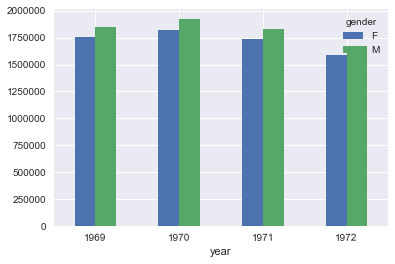

In [99]:
#another cool thing is that we can product nice bivariate plots just with the pivot
#table method: 
%matplotlib inline
import matplotlib.pyplot as plt
births_subset.pivot_table('births',index=['year'],columns='gender',aggfunc='sum').\
plot(kind="bar",rot=True)
#what can you say about the data based on the graph below??

In [100]:
#finally, we can also include margins in the pivot table: 
births_subset.pivot_table('births',index=['year'],columns='gender',aggfunc='sum',
                         margins=True)

gender,F,M,All
year,,,
1969,1753634.0,1846572.0,3600206.0
1970,1819164.0,1918636.0,3737800.0
1971,1736774.0,1826774.0,3563548.0
1972,1592347.0,1673888.0,3266235.0
All,6901919.0,7265870.0,14167789.0


In [105]:
births_subset.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [101]:
#another example: let us see how total births vary by gender for each year, month 
#combination: 
births_subset2=births[(births['month']<=2)&(births['year']<=1970)]
a=births_subset2.pivot_table(values='births',index=['year','month'],columns='gender',aggfunc='sum',
                         margins=True)
a

gender             F         M        All
year month                               
1969 1      143730.0  150210.0   293940.0
     2      132358.0  138428.0   270786.0
1970 1      146754.0  155524.0   302278.0
     2      137826.0  143662.0   281488.0
All         560668.0  587824.0  1148492.0

In [108]:
type(a)

pandas.core.frame.DataFrame

In [110]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [111]:
#exercise solution: find the difference between the max births and min births by year and month:


year  month
1969  1        5406
      2        5354
1970  1        5458
      2        5610
dtype: int64